In [1]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
# Experiments
from scipy.stats import mannwhitneyu

from model import run
# from model.parts.utils import *

df = run.run()
#rdf = run.postprocessing(df)
#rdf = df # debugging substeps# 



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 4, 1, 6)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.05s


In [2]:
df

,soil_moisture,ph,node,cwp,ph_wt,soil_moisture_wt,simulation,subset,run,substep,timestep
0,40.000,5.800,1,50000,0,0,0,0,1,0,0
1,39.998,5.791,88,50100,-50,-50,0,0,1,1,1
2,39.996,5.782,13,50150,-50,100,0,0,1,1,2
3,39.994,5.773,14,50200,-50,100,0,0,1,1,3
4,39.992,5.764,32,50250,-50,100,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
996,38.008,1.337,99,141550,-50,100,0,0,1,1,996
997,38.006,1.335,71,141600,-50,100,0,0,1,1,997
998,38.004,1.333,95,141650,-50,100,0,0,1,1,998
999,38.002,1.331,44,141700,-50,100,0,0,1,1,999


In [3]:
df['timestep'] = pd.to_timedelta(df['timestep'], unit='D') + pd.Timestamp('2023-01-01')

print(df['timestep'])


0      2023-01-01
1      2023-01-02
2      2023-01-03
3      2023-01-04
4      2023-01-05
          ...    
996    2025-09-23
997    2025-09-24
998    2025-09-25
999    2025-09-26
1000   2025-09-27
Name: timestep, Length: 1001, dtype: datetime64[ns]


In [4]:
df

,soil_moisture,ph,node,cwp,ph_wt,soil_moisture_wt,simulation,subset,run,substep,timestep
0,40.000,5.800,1,50000,0,0,0,0,1,0,2023-01-01
1,39.998,5.791,88,50100,-50,-50,0,0,1,1,2023-01-02
2,39.996,5.782,13,50150,-50,100,0,0,1,1,2023-01-03
3,39.994,5.773,14,50200,-50,100,0,0,1,1,2023-01-04
4,39.992,5.764,32,50250,-50,100,0,0,1,1,2023-01-05
...,...,...,...,...,...,...,...,...,...,...,...
996,38.008,1.337,99,141550,-50,100,0,0,1,1,2025-09-23
997,38.006,1.335,71,141600,-50,100,0,0,1,1,2025-09-24
998,38.004,1.333,95,141650,-50,100,0,0,1,1,2025-09-25
999,38.002,1.331,44,141700,-50,100,0,0,1,1,2025-09-26


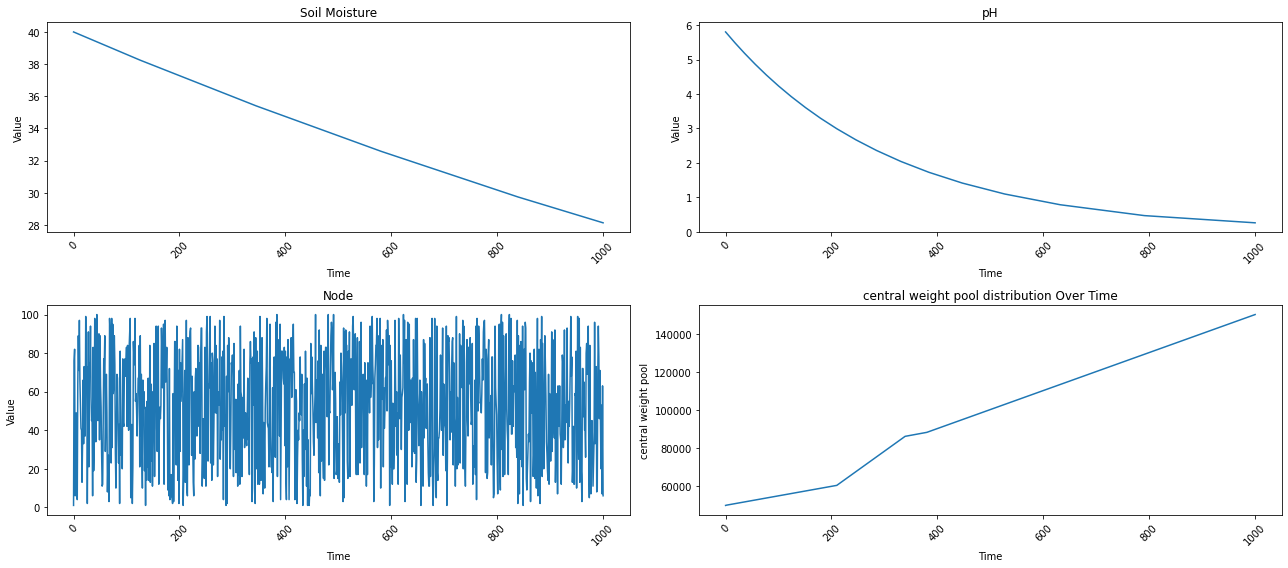

In [66]:
plt.figure(figsize=(18, 8))

# Plotting soil moisture
plt.subplot(2, 2, 1)
plt.plot(df.index, df['soil_moisture'])
plt.title('Soil Moisture')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Plotting pH
plt.subplot(2, 2, 2)
plt.plot(df.index, df['ph'])
plt.title('pH')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Plotting node
plt.subplot(2, 2, 3)
plt.plot(df.index, df['node'])
plt.title('Node')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)

# plotting central weight pool distribution
plt.subplot(2, 2, 4)
plt.plot(df.index, df['cwp'])
plt.xlabel('Time')
plt.ylabel('central weight pool')
plt.title('central weight pool distribution Over Time')
plt.xticks(rotation=45)

# Adjusting subplot spacing
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('my_plot.png')
# Displaying the plots
plt.show()



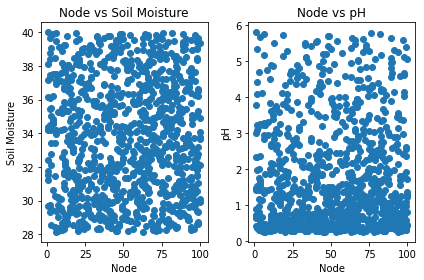

In [67]:
import matplotlib.pyplot as plt

# Scatter plot: Node vs Soil Moisture
plt.subplot(1, 2, 1)
plt.scatter(df['node'], df['soil_moisture'])
plt.xlabel('Node')
plt.ylabel('Soil Moisture')
plt.title('Node vs Soil Moisture')

# Scatter plot: Node vs pH
plt.subplot(1, 2, 2)
plt.scatter(df['node'], df['ph'])
plt.xlabel('Node')
plt.ylabel('pH')
plt.title('Node vs pH')

# Adjusting subplot spacing
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('my_plot.png')

# Displaying the plots
plt.show()


In [7]:
# Group the data by "node" and calculate the sum of "ph_wt" and "soil_moisture_wt"
grouped = df.groupby('node')['ph_wt', 'soil_moisture_wt'].sum()

# Calculate the total weight by summing "ph_wt" and "soil_moisture_wt"
grouped['total_weight'] = grouped['ph_wt'] + grouped['soil_moisture_wt']

# Rank the nodes based on the total weight
grouped['rank'] = grouped['total_weight'].rank(ascending=False)

# Sort the DataFrame by rank in ascending order
grouped.sort_values(by='rank', inplace=True)

# Display the resulting DataFrame with ranks
print(grouped)


      ph_wt  soil_moisture_wt  total_weight  rank
node                                             
90      300              1500          1800   1.0
78      100              1600          1700   2.0
80      150              1500          1650   3.5
30      150              1500          1650   3.5
39      250              1300          1550   5.5
...     ...               ...           ...   ...
70     -450               900           450  94.5
65     -450               900           450  94.5
88     -250               650           400  98.0
6       -50               400           350  99.5
11     -350               700           350  99.5

[100 rows x 4 columns]


<ipython-input-7-f0bbba4b75e3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df.groupby('node')['ph_wt', 'soil_moisture_wt'].sum()


<ipython-input-9-f1a0ef1130a5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df.groupby('node')['ph_wt', 'soil_moisture_wt'].sum()


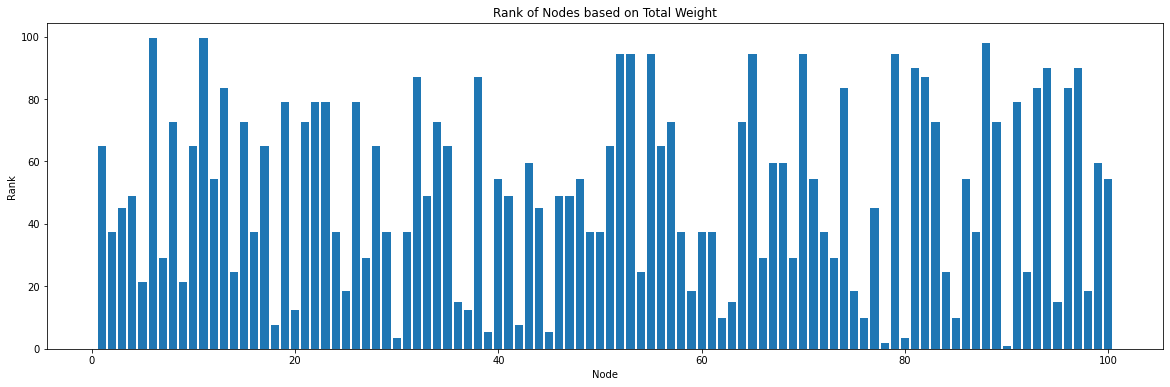

In [9]:
# Group the data by "node" and calculate the sum of "ph_wt" and "soil_moisture_wt"
grouped = df.groupby('node')['ph_wt', 'soil_moisture_wt'].sum()

# Calculate the total weight by summing "ph_wt" and "soil_moisture_wt"
grouped['total_weight'] = grouped['ph_wt'] + grouped['soil_moisture_wt']

# Rank the nodes based on the total weight
grouped['rank'] = grouped['total_weight'].rank(ascending=False)

# Set the figure size to be wider in the x-axis
plt.figure(figsize=(20, 6))

# Sort the DataFrame by rank in ascending order
grouped.sort_values(by='rank', inplace=True)

# Plotting the ranks
plt.bar(grouped.index, grouped['rank'])
plt.xlabel('Node')
plt.ylabel('Rank')
plt.title('Rank of Nodes based on Total Weight')

# Save the figure as a PNG file
plt.savefig('my_plot.png')

# Displaying the plot
plt.show()


In [17]:
grouped

,ph_wt,soil_moisture_wt,total_weight,rank
node,,,,
32,100,-350,-250,1.0
34,-150,-150,-300,2.5
95,-150,-150,-300,2.5
43,-100,-250,-350,5.0
96,-100,-250,-350,5.0
...,...,...,...,...
70,-700,-700,-1400,96.0
26,-650,-800,-1450,97.5
35,-650,-800,-1450,97.5


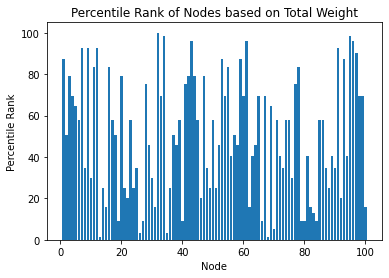

In [18]:
# Calculate the total weight by summing "ph_wt" and "soil_moisture_wt"
grouped['total_weight'] = grouped['ph_wt'] + grouped['soil_moisture_wt']

# Calculate the percentile rank for each node based on the total weight
grouped['percentile_rank'] = grouped['total_weight'].apply(lambda x: percentileofscore(grouped['total_weight'], x))

# Sort the DataFrame by total weight in descending order
grouped.sort_values(by='total_weight', ascending=False, inplace=True)

# Plotting the percentile ranks
plt.bar(grouped.index, grouped['percentile_rank'])
plt.xlabel('Node')
plt.ylabel('Percentile Rank')
plt.title('Percentile Rank of Nodes based on Total Weight')

# Displaying the plot
plt.show()

In [19]:
# Calculate the p-values for each node
p_values = []
for i in range(len(grouped)):
    group1 = grouped['rank'].iloc[i]
    for j in range(i+1, len(grouped)):
        group2 = grouped['rank'].iloc[j]
        statistic, p_value = mannwhitneyu(group1, group2)
        p_values.append(p_value)
print(len(p_values))

4950


In [20]:
p_values = []
nodes = list(grouped.index)  # Get the list of nodes

for i in range(len(nodes)):
    group1 = grouped['rank'].iloc[i]
    for j in range(i + 1, len(nodes)):
        group2 = grouped['rank'].iloc[j]
        statistic, p_value = mannwhitneyu(group1, group2)
        p_values.append(p_value)
print(len(p_values))


4950


ValueError: x and y must be the same size

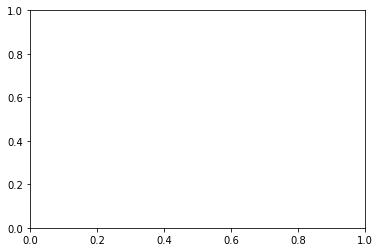

In [21]:
# Calculate the p-values for each node
p_values = []
nodes = list(grouped.index)  # Get the list of nodes

for i in range(len(nodes)):
    group1 = grouped['rank'].iloc[i]
    for j in range(i + 1, len(nodes)):
        group2 = grouped['rank'].iloc[j]
        statistic, p_value = mannwhitneyu(group1, group2)
        p_values.append(p_value)

# Create a scatter plot of p-values with nodes
plt.scatter(nodes, p_values)
plt.xlabel('Node')
plt.ylabel('P-value')
plt.title('Mann-Whitney U Test - P-values')

# Displaying the plot
plt.show()


